# Лабораторная работа № 4

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [438]:
bmw = pd.read_csv("bmw.csv")
bmw = bmw.reindex(columns=['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price'])
bmw.sample(10)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
7547,3 Series,2016,Manual,63000,Diesel,20,72.4,2.0,10490
1473,X4,2019,Automatic,123,Petrol,145,26.9,3.0,47480
2339,X1,2019,Semi-Auto,4928,Diesel,145,60.1,2.0,25745
323,X4,2015,Manual,53755,Diesel,160,52.3,2.0,19485
7666,1 Series,2016,Manual,51000,Diesel,20,70.6,1.5,10490
10450,X1,2016,Manual,35746,Diesel,20,68.9,2.0,15000
7682,1 Series,2016,Manual,40000,Diesel,0,83.1,1.5,9990
7519,5 Series,2012,Automatic,76000,Diesel,125,60.1,2.0,9250
9582,2 Series,2017,Manual,14980,Petrol,125,52.3,1.5,13799
10237,3 Series,2008,Manual,85000,Petrol,555,28.5,3.0,8790


In [439]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   transmission  10781 non-null  object 
 3   mileage       10781 non-null  int64  
 4   fuelType      10781 non-null  object 
 5   tax           10781 non-null  int64  
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
 8   price         10781 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [440]:
bmw.describe()

,year,mileage,tax,mpg,engineSize,price
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,25496.986550,131.702068,56.399035,2.167767,22733.408867
std,2.349038,25143.192559,61.510755,31.336958,0.552054,11415.528189
min,1996.000000,1.000000,0.000000,5.500000,0.000000,1200.000000
25%,2016.000000,5529.000000,135.000000,45.600000,2.000000,14950.000000
50%,2017.000000,18347.000000,145.000000,53.300000,2.000000,20462.000000
75%,2019.000000,38206.000000,145.000000,62.800000,2.000000,27940.000000
max,2020.000000,214000.000000,580.000000,470.800000,6.600000,123456.000000


## 1. Выполнить описательный анализ

### Для количественных показателей

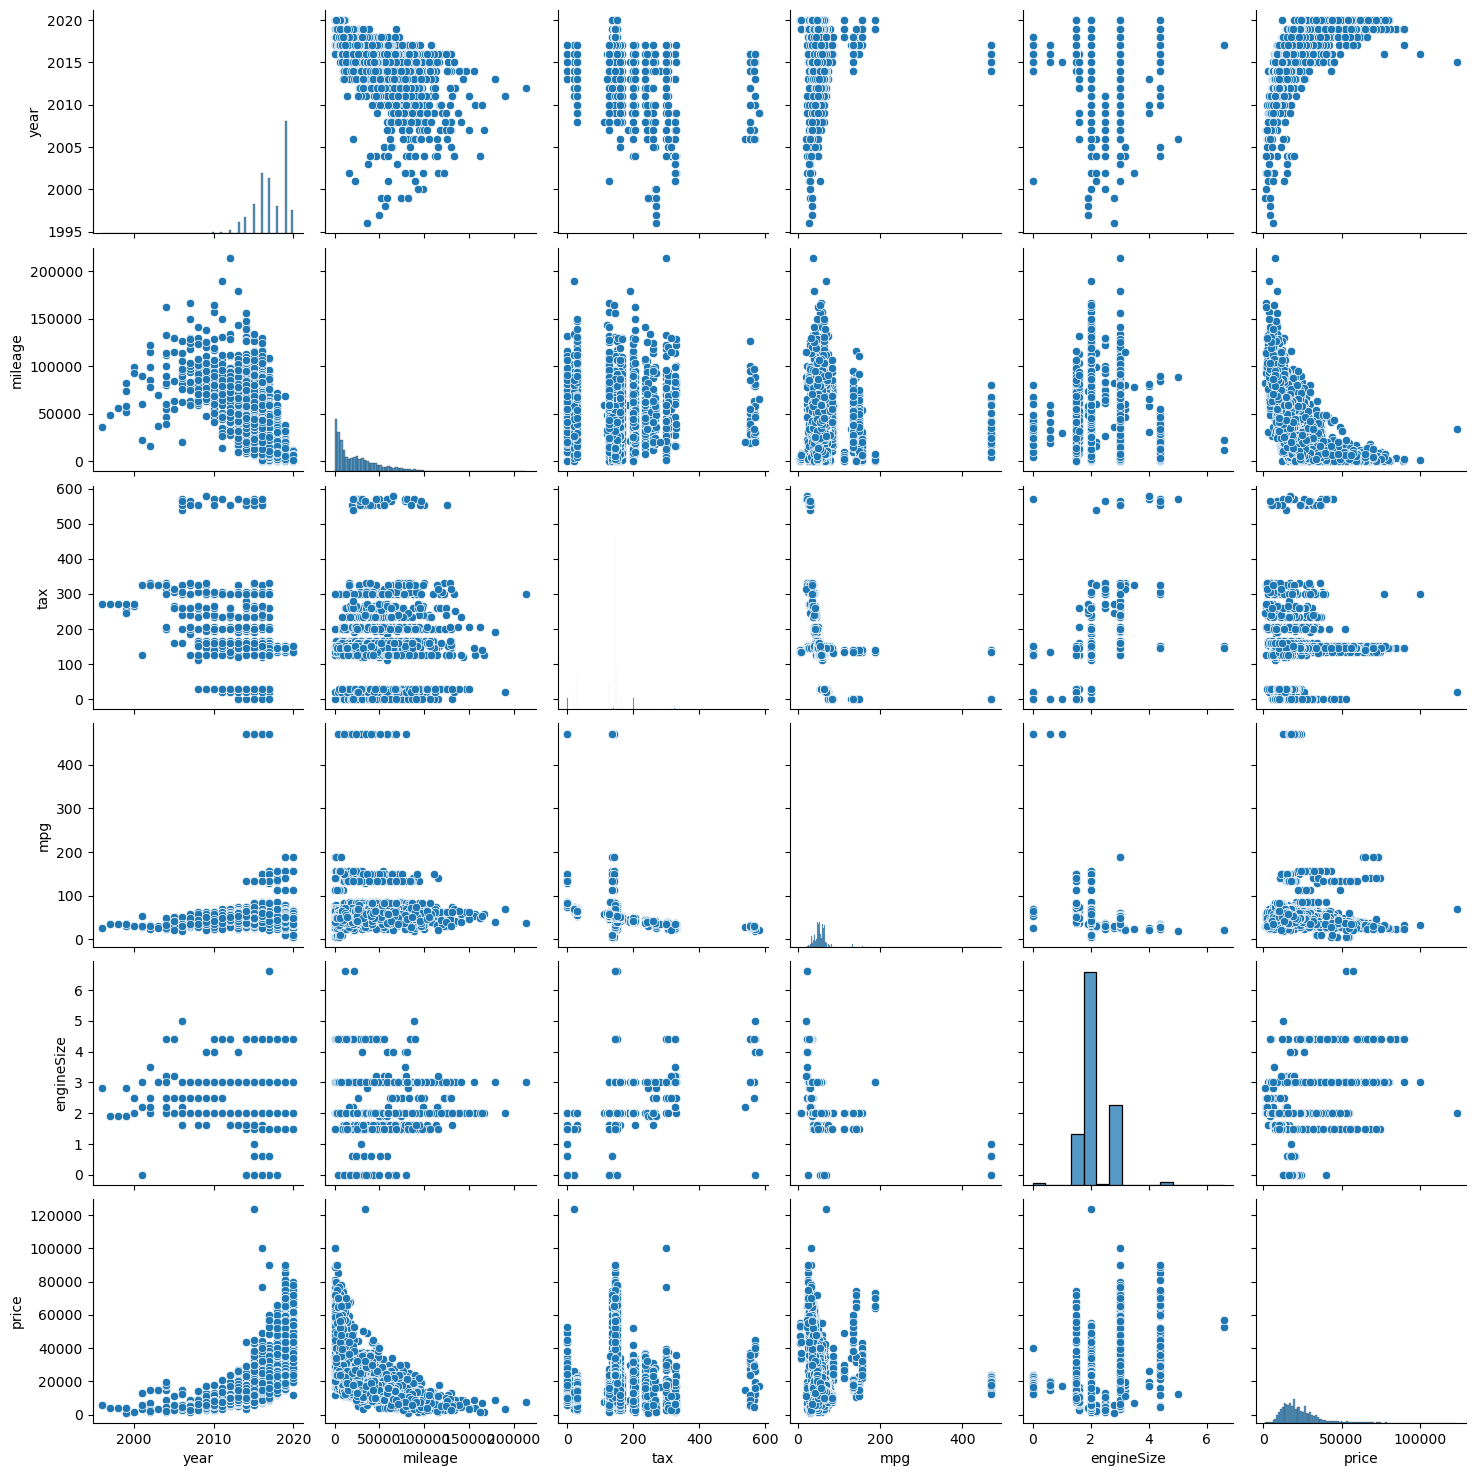

In [441]:
sns.pairplot(bmw)

Зависимость прослеживается больше всего с показателями year и mileage

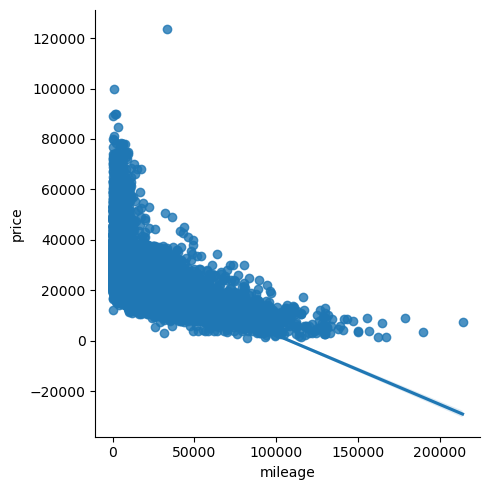

In [442]:
sns.lmplot(x = "mileage", y = "price", data = bmw)

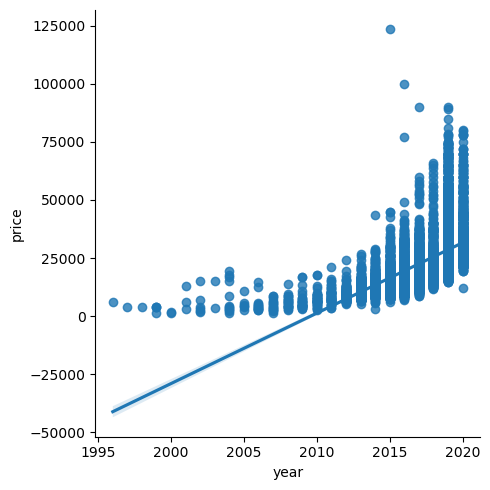

In [443]:
sns.lmplot(x = "year", y = "price", data = bmw)

/var/folders/0d/0zl92nhd0bs8sh_jwvbd0l240000gn/T/ipykernel_81518/3189102638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bmw.corr(method = 'kendall'), annot = True)


<Axes: >

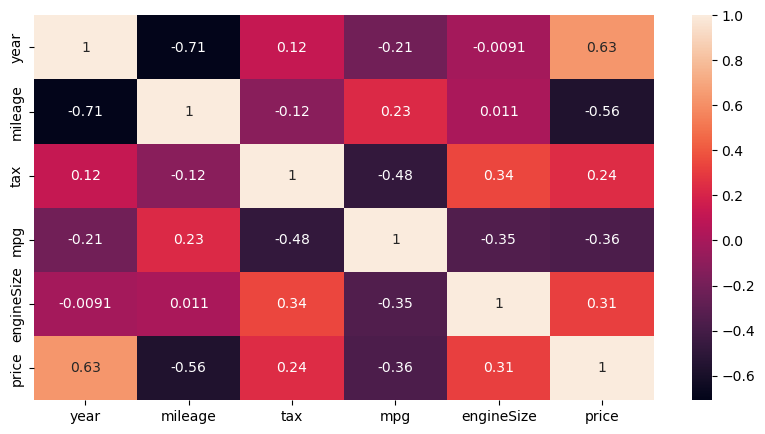

In [444]:
plt.figure(figsize = (10, 5))
sns.heatmap(bmw.corr(method = 'kendall'), annot = True)

Наилучшая зависимость прослеживается с показателем year.

### Для качественных показателей

<Axes: xlabel='price', ylabel='Count'>

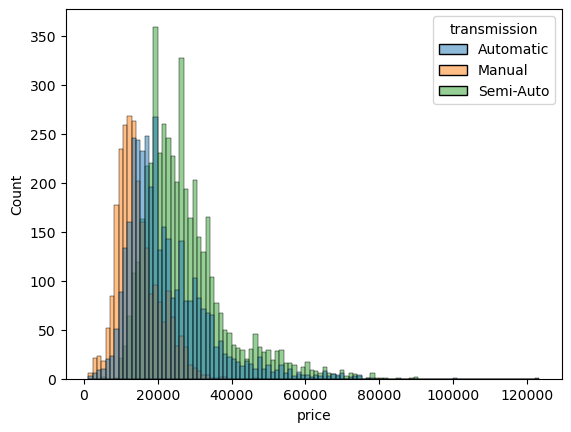

In [445]:
sns.histplot(x = "price", data = bmw, hue = 'transmission') 

<Axes: xlabel='price', ylabel='Count'>

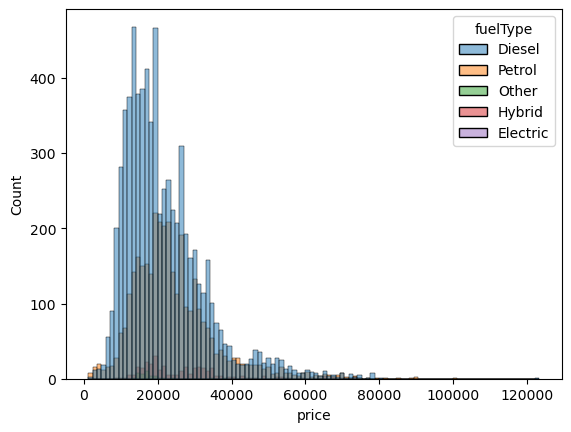

In [446]:
sns.histplot(x = "price", data = bmw, hue = 'fuelType') 

### Отдельно для порядковых и интервальных показателей

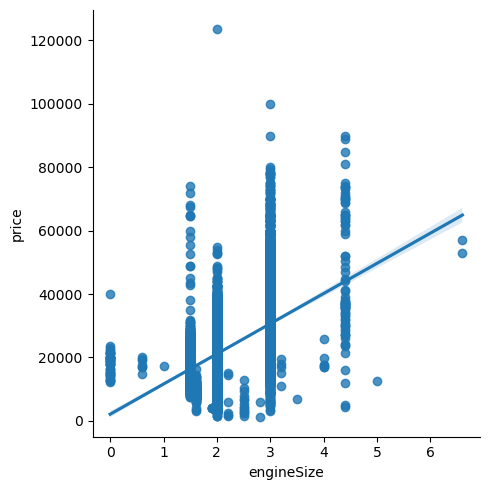

In [447]:
sns.lmplot(x = "engineSize", y = "price", data = bmw)

<Axes: xlabel='engineSize', ylabel='price'>

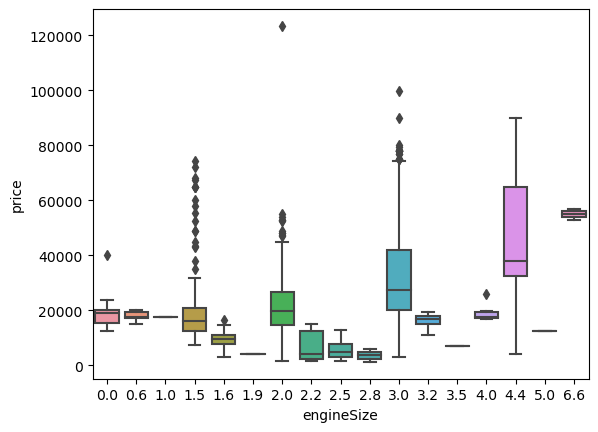

In [448]:
sns.boxplot(x = "engineSize", y = "price", data = bmw)

<Axes: xlabel='year', ylabel='price'>

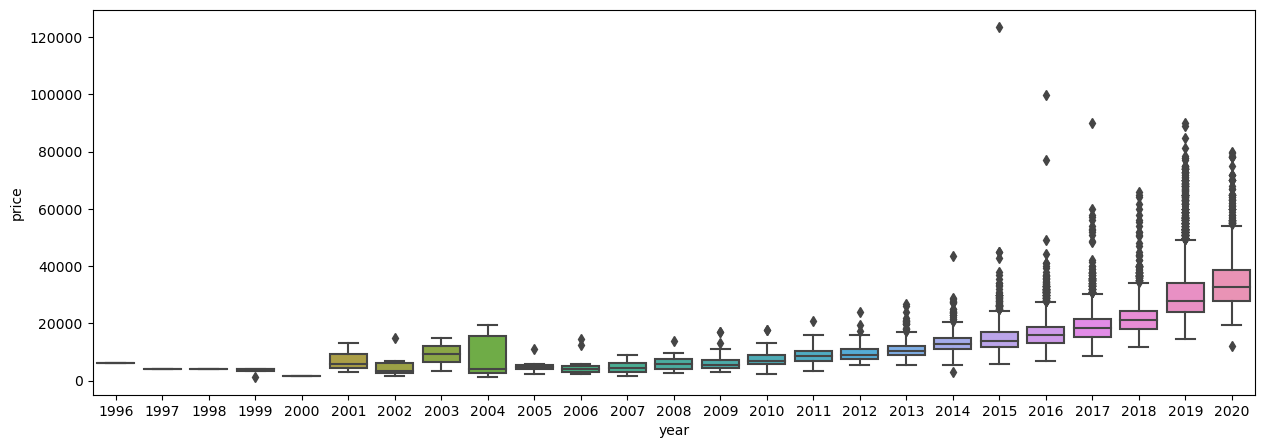

In [449]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = "year", y = "price", data = bmw)

## 2. Построение базовых регрессионных моделей

In [450]:
X = bmw.drop("price", axis=1)
Y = bmw.price
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
print("Размер обучающей выборки X: ", X_train.shape)
print("Размер обучающей выборки Y: ", Y_train.shape)
print("Размер тестовой выборки X: ", X_test.shape)
print("Размер тестовой выборки Y: ", Y_test.shape)

Размер обучающей выборки X:  (8624, 8)
Размер обучающей выборки Y:  (8624,)
Размер тестовой выборки X:  (2157, 8)
Размер тестовой выборки Y:  (2157,)


###  Constant (среднее значение целевого показателя)

In [451]:
base = bmw['price']
constant_model = base.mean()
constant_model

22733.408867452

In [452]:
mean_results = pd.Series([constant_model] * len(bmw))
print("R2 Score: ", r2_score(base, mean_results))

R2 Score:  0.0


### ConstantByGroup (среднее значение на основе одного из показателей)

In [453]:
constant_by_group = bmw.groupby(by='model')['price']
constant_by_group_model = constant_by_group.mean()
constant_by_group_model

model
 1 Series    15821.670391
 2 Series    19539.371847
 3 Series    19880.857962
 4 Series    22498.418090
 5 Series    22537.428030
 6 Series    24354.370370
 7 Series    36934.320755
 8 Series    63997.794872
 M2          43140.333333
 M3          30229.777778
 M4          43274.232000
 M5          57760.000000
 M6          32190.000000
 X1          19816.564677
 X2          28486.663194
 X3          27758.310345
 X4          32721.335196
 X5          39651.196581
 X6          43838.613208
 X7          69842.763636
 Z3           5826.428571
 Z4          27001.935185
 i3          18667.116279
 i8          57012.588235
Name: price, dtype: float64

### OneParamModel (линейная регрессионная модель на базе одного выбранного показателя)

In [454]:
LR_One = LinearRegression()
X_train_one = X_train['year'].values.reshape(-1, 1)
X_test_one = X_test['year'].values.reshape(-1, 1)
LR_One.fit(X_train_one, Y_train)

Y_test_LR_One = LR_One.predict(X_test_one)

print("R2 Score: ", r2_score(Y_test, Y_test_LR_One))

R2 Score:  0.397176333039989


In [455]:
print('Смещение = ', LR_One.intercept_)
print('Коэффицент = ', LR_One.coef_)

Смещение =  -5987988.0779307615
Коэффицент =  [2979.91457983]


## 3. Постройте линейные регрессионные модели для прогноза целевого показателя

### Для всех показателей

####  Без проведения нормализации 

In [456]:
X_train_all = pd.get_dummies(X_train)
X_test_all = pd.get_dummies(X_test)

LR_all = LinearRegression()
LR_all.fit(X_train_all, Y_train)

Y_test_LR_all = LR_all.predict(X_test_all)

print("R2 Score: ", r2_score(Y_test, Y_test_LR_all))

R2 Score:  0.8707961437633828


In [457]:
print("Смещение = ", LR_all.intercept_)
pd.Series(LR_all.coef_, index=X_train_all.columns)

Смещение =  -3476948.3393882727


year                       1743.480110
mileage                      -0.116328
tax                          -9.956370
mpg                        -109.431026
engineSize                 3720.715934
model_ 1 Series          -14915.819495
model_ 2 Series          -15016.173565
model_ 3 Series          -12291.235844
model_ 4 Series          -12295.641266
model_ 5 Series          -10251.224708
model_ 6 Series          -10195.056815
model_ 7 Series           -1229.112908
model_ 8 Series           18041.126456
model_ M2                 -2143.071744
model_ M3                   822.383760
model_ M4                   836.155722
model_ M5                 13632.353514
model_ M6                 -2908.228616
model_ X1                -12430.033031
model_ X2                -11085.171683
model_ X3                 -6631.971577
model_ X4                 -5274.403416
model_ X5                  1586.382863
model_ X6                  3572.086330
model_ X7                 24955.142092
model_ Z3                

####  C нормализацией

In [458]:
minmaxScaler = MinMaxScaler()
X_train_scaled = minmaxScaler.fit_transform(X_train_all)
X_test_scaled = minmaxScaler.transform(X_test_all)

In [459]:
LR_Sc = LinearRegression()
LR_Sc.fit(X_train_scaled, Y_train)
Y_test_LR_Sc = LR_Sc.predict(X_test_scaled)

print("R2 Score: ", r2_score(Y_test, Y_test_LR_Sc))

R2 Score:  0.8703905059080979


In [460]:
print("Смещение = ", LR_Sc.intercept_)
pd.Series(LR_Sc.coef_, index=X_train_all.columns)

Смещение =  5.273602667920508e+16


year                      4.184710e+04
mileage                  -2.464840e+04
tax                      -7.039375e+03
mpg                      -5.044893e+04
engineSize                2.320023e+04
model_ 1 Series          -3.080964e+16
model_ 2 Series          -3.080964e+16
model_ 3 Series          -3.080964e+16
model_ 4 Series          -3.080964e+16
model_ 5 Series          -3.080964e+16
model_ 6 Series          -3.080964e+16
model_ 7 Series          -3.080964e+16
model_ 8 Series          -3.080964e+16
model_ M2                -3.080964e+16
model_ M3                -3.080964e+16
model_ M4                -3.080964e+16
model_ M5                -3.080964e+16
model_ M6                -3.080964e+16
model_ X1                -3.080964e+16
model_ X2                -3.080964e+16
model_ X3                -3.080964e+16
model_ X4                -3.080964e+16
model_ X5                -3.080964e+16
model_ X6                -3.080964e+16
model_ X7                -3.080964e+16
model_ Z3                

### Для количественных показателей

####  Без проведения нормализации 

In [461]:
X_train_1 = X_train.drop(['model', 'transmission','fuelType'], axis='columns') 
X_test_1 = X_test.drop(['model', 'transmission','fuelType'], axis='columns')

LR_cnt = LinearRegression()
LR_cnt.fit(X_train_1, Y_train)

Y_test_LR_cnt = LR_cnt.predict(X_test_1)

print("R2 Score: ", r2_score(Y_test, Y_test_LR_cnt))

R2 Score:  0.6425708523484354


In [462]:
print("Смещение = ", LR_cnt.intercept_)
pd.Series(LR_cnt.coef_, index=X_train_1.columns)

Смещение =  -4019383.835818391


year          1993.980821
mileage         -0.131055
tax              3.913403
mpg             21.784321
engineSize    9986.152299
dtype: float64

####  C нормализацией

In [463]:
minmaxScaler = MinMaxScaler()
X_train_scaled_1 = minmaxScaler.fit_transform(X_train_1)
X_test_scaled_1 = minmaxScaler.transform(X_test_1)

In [464]:
LR_Sc_1 = LinearRegression()
LR_Sc_1.fit(X_train_scaled_1, Y_train)
Y_test_LR_Sc_1 = LR_Sc_1.predict(X_test_scaled_1)

print("R2 Score: ", r2_score(Y_test, Y_test_LR_Sc_1))

R2 Score:  0.6425708523484368


In [465]:
print("Смещение = ", LR_Sc_1.intercept_)
pd.Series(LR_Sc_1.coef_, index=X_train_1.columns)

Смещение =  -39278.69716569061


year          47855.539696
mileage      -28045.381898
tax            2269.773711
mpg           10136.244367
engineSize    65908.605173
dtype: float64

### Для качественных показателей

####  Без проведения нормализации 

In [466]:
X_train_2 = X_train.drop(['year','mileage','tax','mpg','engineSize'], axis='columns') 
X_test_2 = X_test.drop(['year','mileage','tax','mpg','engineSize'], axis='columns')

X_train_2 = pd.get_dummies(X_train_2)
X_test_2 = pd.get_dummies(X_test_2)

LR_qual = LinearRegression()
LR_qual.fit(X_train_2, Y_train)

Y_test_LR_qual = LR_qual.predict(X_test_2)

print("R2 Score: ", r2_score(Y_test, Y_test_LR_qual))

R2 Score:  0.5833424555248593


In [467]:
print("Смещение = ", LR_qual.intercept_)
pd.Series(LR_qual.coef_, index=X_train_2.columns)

Смещение =  -3538107940897409.5


model_ 1 Series          -2.243488e+15
model_ 2 Series          -2.243488e+15
model_ 3 Series          -2.243488e+15
model_ 4 Series          -2.243488e+15
model_ 5 Series          -2.243488e+15
model_ 6 Series          -2.243488e+15
model_ 7 Series          -2.243488e+15
model_ 8 Series          -2.243488e+15
model_ M2                -2.243488e+15
model_ M3                -2.243488e+15
model_ M4                -2.243488e+15
model_ M5                -2.243488e+15
model_ M6                -2.243488e+15
model_ X1                -2.243488e+15
model_ X2                -2.243488e+15
model_ X3                -2.243488e+15
model_ X4                -2.243488e+15
model_ X5                -2.243488e+15
model_ X6                -2.243488e+15
model_ X7                -2.243488e+15
model_ Z3                -2.243488e+15
model_ Z4                -2.243488e+15
model_ i3                -2.243488e+15
model_ i8                -2.243488e+15
transmission_Automatic    7.370268e+15
transmission_Manual      

####  C нормализацией

In [468]:
minmaxScaler = MinMaxScaler()
X_train_scaled_2 = minmaxScaler.fit_transform(X_train_2)
X_test_scaled_2 = minmaxScaler.transform(X_test_2)

In [469]:
LR_Sc_2 = LinearRegression()
LR_Sc_2.fit(X_train_scaled_2, Y_train)
Y_test_LR_Sc_2 = LR_Sc_2.predict(X_test_scaled_2)

print("R2 Score: ", r2_score(Y_test, Y_test_LR_Sc_2))

R2 Score:  0.5833410359287641


In [470]:
print("Смещение = ", LR_Sc_2.intercept_)
pd.Series(LR_Sc_2.coef_, index=X_train_2.columns)

Смещение =  -3538107940897409.5


model_ 1 Series          -2.243488e+15
model_ 2 Series          -2.243488e+15
model_ 3 Series          -2.243488e+15
model_ 4 Series          -2.243488e+15
model_ 5 Series          -2.243488e+15
model_ 6 Series          -2.243488e+15
model_ 7 Series          -2.243488e+15
model_ 8 Series          -2.243488e+15
model_ M2                -2.243488e+15
model_ M3                -2.243488e+15
model_ M4                -2.243488e+15
model_ M5                -2.243488e+15
model_ M6                -2.243488e+15
model_ X1                -2.243488e+15
model_ X2                -2.243488e+15
model_ X3                -2.243488e+15
model_ X4                -2.243488e+15
model_ X5                -2.243488e+15
model_ X6                -2.243488e+15
model_ X7                -2.243488e+15
model_ Z3                -2.243488e+15
model_ Z4                -2.243488e+15
model_ i3                -2.243488e+15
model_ i8                -2.243488e+15
transmission_Automatic    7.370268e+15
transmission_Manual      

## 4. Применение других регрессионных моделей 

### Полиномиальная регрессионная модель 

#### Без регуляризации

In [471]:
quantitative_columns = ['year','mileage','tax','mpg','engineSize']

poly = PolynomialFeatures(2, include_bias=False)
poly_x_train = poly.fit_transform(X_train_all[quantitative_columns])
poly_x_test = poly.fit_transform(X_test_all[quantitative_columns])

LR_poly = LinearRegression()
LR_poly.fit(poly_x_train, Y_train)

poly_Y_test = LR_poly.predict(poly_x_test)

print("R2 Score: ", r2_score(Y_test, poly_Y_test))

R2 Score:  0.7328760984602949


In [472]:
print("Смещение = ", LR_poly.intercept_)
print(pd.Series(LR_poly.coef_, index=poly.get_feature_names_out()).sort_values(ascending=False))

Смещение =  351496608.7770874
mpg                   8.930054e+03
year engineSize       1.015802e+03
tax                   9.560286e+02
engineSize^2          1.954139e+02
year^2                8.693504e+01
mileage               2.540198e+01
mpg^2                 8.099883e-02
tax^2                 5.093658e-02
mileage tax           1.465505e-04
mileage^2             6.709759e-07
mileage mpg          -1.322113e-04
year mileage         -1.258432e-02
tax mpg              -1.551367e-02
mileage engineSize   -9.326680e-02
year tax             -4.733284e-01
year mpg             -4.423805e+00
tax engineSize       -7.778741e+00
mpg engineSize       -2.261658e+01
year                 -3.496155e+05
engineSize           -2.035964e+06
dtype: float64


#### С регуляризацией 

In [473]:
LR_lasso = Lasso()
LR_lasso.fit(poly_x_train, Y_train)

poly_Y_test = LR_lasso.predict(poly_x_test)

print("R2 Score: ", r2_score(Y_test, poly_Y_test))

R2 Score:  0.7147934020168222


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.490e+11, tolerance: 1.115e+08
  model = cd_fast.enet_coordinate_descent(


In [474]:
print("Смещение = ", LR_lasso.intercept_)
print(pd.Series(LR_lasso.coef_, index=poly.get_feature_names_out()).sort_values(ascending=False))

Смещение =  -2777101.5443695295
engineSize            9386.559118
year                   973.303926
engineSize^2           168.235354
tax                     63.183805
year engineSize          3.581659
year^2                   0.199080
mpg^2                    0.130587
tax^2                    0.058843
year mpg                 0.016999
mileage                  0.002481
mileage tax              0.000404
year mileage             0.000026
mileage^2                0.000002
mileage mpg             -0.000238
year tax                -0.022886
tax mpg                 -0.103460
mileage engineSize      -0.185634
tax engineSize         -17.802010
mpg engineSize         -22.269880
mpg                    -38.760300
dtype: float64


### Модель на основе дерева решений 

In [475]:
LR_tree = DecisionTreeRegressor()
LR_tree.fit(X_train_all, Y_train)

tree_Y_test = LR_tree.predict(X_test_all)

print("R2 Score: ", r2_score(Y_test, tree_Y_test))
print(pd.Series(LR_tree.feature_importances_, index=X_train_all.columns).sort_values(ascending=False))

R2 Score:  0.9207521525181569
year                      4.451004e-01
engineSize                2.619394e-01
mpg                       8.741373e-02
mileage                   6.328011e-02
model_ X5                 1.812994e-02
tax                       1.775146e-02
model_ i8                 1.529649e-02
transmission_Manual       1.407722e-02
model_ X7                 1.329420e-02
model_ 7 Series           8.242718e-03
model_ 8 Series           7.731892e-03
model_ 1 Series           7.611247e-03
model_ X3                 6.952613e-03
model_ 2 Series           5.859434e-03
model_ X6                 5.460155e-03
model_ 5 Series           3.677415e-03
transmission_Semi-Auto    2.410941e-03
fuelType_Diesel           2.334304e-03
model_ 3 Series           2.036487e-03
model_ M5                 1.977294e-03
transmission_Automatic    1.591433e-03
model_ X4                 1.448963e-03
model_ 4 Series           1.138189e-03
model_ X1                 9.676576e-04
fuelType_Petrol           9.606566

### Модель на основе случайного леса

In [476]:
LR_randomForest = RandomForestRegressor()
LR_randomForest.fit(X_train_all, Y_train)

forest_Y_test = LR_randomForest.predict(X_test_all)

print("R2 Score: ", r2_score(Y_test, forest_Y_test))
print(pd.Series(LR_randomForest.feature_importances_, index=X_train_all.columns).sort_values(ascending=False))

R2 Score:  0.9522372331715366
year                      4.474216e-01
engineSize                2.637931e-01
mpg                       8.469548e-02
mileage                   6.883727e-02
model_ i8                 1.634260e-02
transmission_Manual       1.504938e-02
model_ X5                 1.326382e-02
model_ X7                 1.304866e-02
tax                       1.132404e-02
model_ 8 Series           8.335194e-03
model_ 7 Series           7.531581e-03
model_ 2 Series           7.453341e-03
model_ X3                 7.375966e-03
model_ 1 Series           6.955757e-03
model_ X6                 5.456587e-03
model_ 5 Series           3.875002e-03
model_ X4                 2.319989e-03
fuelType_Hybrid           2.156622e-03
model_ 3 Series           2.070843e-03
fuelType_Diesel           1.843584e-03
fuelType_Petrol           1.737180e-03
transmission_Semi-Auto    1.694237e-03
transmission_Automatic    1.568095e-03
model_ 4 Series           1.428657e-03
model_ X1                 1.043250